In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import nltk

In [3]:
train = pd.read_csv("data/train.csv")

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
for index,row in train.sample(5).iterrows():
    print(str(row['id']) + ":" + row['text'] + " =" + str(row['target']))
    print (" ")

54:@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season. =0
 
7601:@hashtagteaclub place out. It was ex Pars defender Andy Tod in full uniform. It was instant pandemonium. Utter mayhem ensued! =0
 
2761:for some reason im listening to curfew overtime and stuck in a kodak over and over again =0
 
9659:My room looks like a tornado passed through it and my OCD is not having it. =0
 
8266:@BLutz10 People aren't rioting because justice has been served and that murderer is behind bars. Simple! No justice=no peace Justice=peace. =1
 


In [6]:
train.isnull().sum()


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
train.shape

(7613, 5)

Tasks:
    
- get word counts for 0 and 1 labels
https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571 
https://monkeylearn.com/text-analysis/ 

In [8]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
import collections
from nltk.corpus import stopwords  
import seaborn as sns


Refs: 

https://www.geeksforgeeks.org/removing-stop-words-nltk-python/ --> for stopwords

In [10]:
# get list of stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tejasphaterpekar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Get a list of all text entries
tweet_collection = [tweet for tweet in train['text']]

# concatenate into 1 large text base 
corpus = " ".join(tweet_collection)

Let's start by doing a word frequency analysis to see what the most popular words are

In [12]:
counter = collections.Counter(corpus.lower().split())

In [13]:
#establish stopped word dictionary
stopped_words = collections.defaultdict(int)

In [14]:
# Searching and removing stopwords
for stop_word in list(stop_words):
    if stop_word in counter.keys():
        stopped_words[stop_word] = counter[stop_word]
        del counter[stop_word]
        

In [15]:
# stopped_words

In [16]:
pop_words = counter.most_common()

In [17]:
x = []
y = []
for word, count  in pop_words[:10]:
    x.append(word)
    y.append(count)

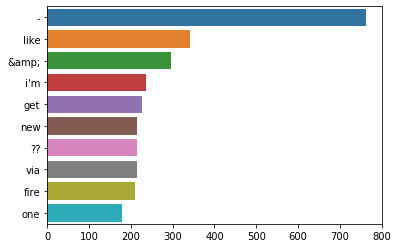

In [18]:
sns.barplot(x = y, y = x)

Have a good skeleton, but need to remove punctuation and weird characters.

In [19]:
import statistics

In [20]:
# Using tweet collection from above exploration
tweet_collection[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [21]:
# slightly complicated code, and perhaps a little inefficient?
# basically split each sentence into a list of words (while still maintaining the initial list)
# then get word lengths and average these numbers (thus collapsing the internal lists)
avg_word_length = list(map(lambda x: statistics.mean(len(y) for y in x), [x.split() for x in tweet_collection]))

In [22]:
# list(map(lambda x: len(x.split()), tweet_collection)) --> equivalent code for below

In [23]:
word_counts = [len(x.split()) for x in tweet_collection]

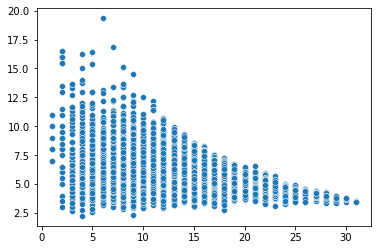

In [24]:
sns.scatterplot(x = word_counts, y = avg_word_length)

There does seem to be a slightly decreasing trend in tweet lengths and the avg length of the word (mostly explained by variability d/t sentence length) --> not very useful

Sentiment Analysis Segment
https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f 

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tejasphaterpekar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
pos_test = "The dog is happy"
neg_test = "You look so ugly"

In [28]:
sid.polarity_scores(pos_test)

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [29]:
sid.polarity_scores(neg_test)

{'neg': 0.586, 'neu': 0.414, 'pos': 0.0, 'compound': -0.6418}

In [30]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [31]:
# from https://stackoverflow.com/questions/61608057/output-vader-sentiment-scores-in-columns-based-on-dataframe-rows-of-tweets 
train['positive'] = [sid.polarity_scores(x)['pos'] for x in train['text']]
train['negative'] = [sid.polarity_scores(x)['neg'] for x in train['text']]
train['neutral'] = [sid.polarity_scores(x)['neu'] for x in train['text']]
train['compound'] = [sid.polarity_scores(x)['compound'] for x in train['text']]

In [32]:
train.head()

,id,keyword,location,text,target,positive,negative,neutral,compound
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0.149,0.000,0.851,0.2732
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0.000,0.286,0.714,-0.3400
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0.000,0.095,0.905,-0.2960
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0.000,0.000,1.000,0.0000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0.000,0.000,1.000,0.0000


In [34]:
# small experiement to see how compound predicts sentiment
train['analyzer_pred'] =  train['compound'].apply(lambda x: 1 if x > 0 else 0)

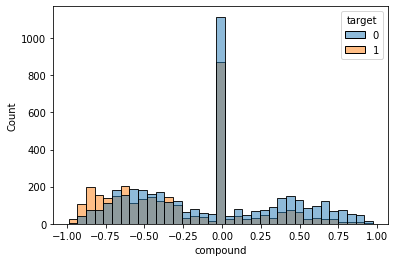

In [40]:
sns.histplot(data = train,x = 'compound' )

Above is the distribution of compound score w/ whether its identified a disaster vs no disaster tweet. There is some shift in the distribution where negative compound scores seem to correlate w/ more disaster tweets than not. Same vice versa. There are lots of sentences with a compound of 0.00 (not exactly sure what leads to a score of 0). Lets take a look at how the outputs of the analyzer relate.

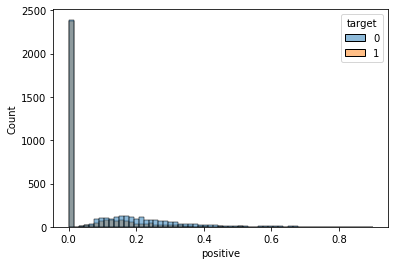

In [50]:
# had to remove any pos values of 0 from the histogram for better visualization (binrange = (0.000001, 1))
sns.histplot(data = train,x = 'positive', hue = 'target' )

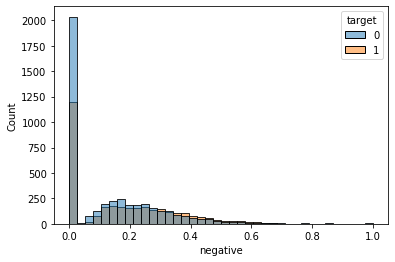

In [49]:
sns.histplot(data = train,x = 'negative', hue = 'target' )

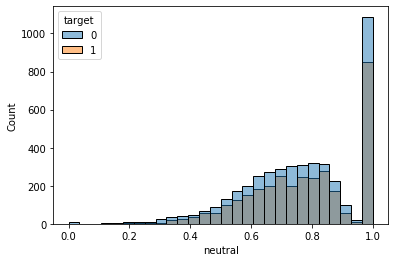

In [46]:
sns.histplot(data = train,x = 'neutral', hue = 'target')

Some interesting findings here. The distribution of non-disaster tweets vs disaster tweets seemed somewhat separated when using the positive analyzer values. Could be a useful feature. There was less of a difference in the neutral and negative analyzer values. Also, need to figure out how to deal with 0 values for these analyzer values. 